In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.dpi'] = '600'
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.figsize'] = [3*cm, 4*cm]


In [2]:
SONSRRM2depl_0h_path = "../data/SONSRRM2depletion/0h/"
SONSRRM2depl_6h_path = "../data/SONSRRM2depletion/6h/"
control_0h_path = "../data/DMSOcontrol/0h/"
control_6h_path = "../data/DMSOcontrol/6h/"

In [3]:
#load and concatenate data for SON & SRRM2 depletion intial timepoint

df = pd.DataFrame()
for num in range(1,18):
    SONSRRM2_0h= pd.read_csv(SONSRRM2depl_0h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = (SONSRRM2_0h["Distance_(inches)"] - np.min(SONSRRM2_0h["Distance_(inches)"])) / (np.max(SONSRRM2_0h["Distance_(inches)"]) - np.min(SONSRRM2_0h["Distance_(inches)"]))
    tmp["intensity"] = (SONSRRM2_0h["Gray_Value"] - np.min(SONSRRM2_0h["Gray_Value"])) / (np.max(SONSRRM2_0h["Gray_Value"]) - np.min(SONSRRM2_0h["Gray_Value"])) #normalization
    tmp['timepoint'] = '0h'
    tmp['cell_num'] = num    
    df = pd.concat([df, tmp])
    
df.head()

,Distance,intensity,timepoint,cell_num
0,0.000000,0.569436,0h,1
1,0.009173,0.630261,0h,1
2,0.018350,0.651124,0h,1
3,0.027523,0.703710,0h,1
4,0.036696,0.732699,0h,1


In [4]:
#load and concatenate data for SON & SRRM2 depletion final timepoint

for num in range(1,18):
    SONSRRM2_6h= pd.read_csv(SONSRRM2depl_6h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = (SONSRRM2_6h["Distance_(inches)"] - np.min(SONSRRM2_6h["Distance_(inches)"])) / (np.max(SONSRRM2_6h["Distance_(inches)"]) - np.min(SONSRRM2_6h["Distance_(inches)"]))
    tmp["intensity"] = (SONSRRM2_6h["Gray_Value"] - np.min(SONSRRM2_6h["Gray_Value"])) / (np.max(SONSRRM2_6h["Gray_Value"]) - np.min(SONSRRM2_6h["Gray_Value"])) #normalization
    tmp['timepoint'] = '6h'
    tmp['cell_num'] = num    
    df = pd.concat([df, tmp])
    
    
df.tail()

,Distance,intensity,timepoint,cell_num
92,0.958334,0.562498,6h,17
93,0.968750,0.195309,6h,17
94,0.979166,0.286462,6h,17
95,0.989584,0.234374,6h,17
96,1.000000,0.156253,6h,17


In [5]:
#round distance values

df['norm_distance'] = df["Distance"].round(decimals=2)
df.head()

,Distance,intensity,timepoint,cell_num,norm_distance
0,0.000000,0.569436,0h,1,0.00
1,0.009173,0.630261,0h,1,0.01
2,0.018350,0.651124,0h,1,0.02
3,0.027523,0.703710,0h,1,0.03
4,0.036696,0.732699,0h,1,0.04


In [6]:
#load and concatenate data for DMSO control intial timepoint

df_control = pd.DataFrame()
for num in range(1,18):
    control_0h= pd.read_csv(control_0h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = (control_0h["Distance_(inches)"] - np.min(control_0h["Distance_(inches)"])) / (np.max(control_0h["Distance_(inches)"]) - np.min(control_0h["Distance_(inches)"]))
    tmp["intensity"] = (control_0h["Gray_Value"] - np.min(control_0h["Gray_Value"])) / (np.max(control_0h["Gray_Value"]) - np.min(control_0h["Gray_Value"])) #normalization so they all start at 0 and end at 1
    tmp['timepoint'] = '0h'
    tmp['cell_num'] = num
    
    df_control = pd.concat([df_control, tmp])
    
df_control.head()

,Distance,intensity,timepoint,cell_num
0,0.000000,0.094508,0h,1
1,0.013888,0.008153,0h,1
2,0.027779,0.013589,0h,1
3,0.041667,0.000000,0h,1
4,0.055554,0.076623,0h,1


In [7]:
#load and concatenate data for DMSO control final timepoint
 
for num in range(1,18):
    control_6h= pd.read_csv(control_6h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = (control_6h["Distance_(inches)"] - np.min(control_6h["Distance_(inches)"])) / (np.max(control_6h["Distance_(inches)"]) - np.min(control_6h["Distance_(inches)"]))
    tmp["intensity"] = (control_6h["Gray_Value"] - np.min(control_6h["Gray_Value"])) / (np.max(control_6h["Gray_Value"]) - np.min(control_6h["Gray_Value"])) #normalization so they all start at 0 and end at 1
    tmp['timepoint'] = '6h'
    tmp['cell_num'] = num
    
    df_control = pd.concat([df_control, tmp])
    

df_control.tail()

,Distance,intensity,timepoint,cell_num
92,0.958334,0.109303,6h,17
93,0.968750,0.193862,6h,17
94,0.979166,0.047303,6h,17
95,0.989584,0.000000,6h,17
96,1.000000,0.145449,6h,17


In [8]:
#round distance values

df_control['norm_distance'] = df_control["Distance"].round(decimals=2)
df_control.head()


,Distance,intensity,timepoint,cell_num,norm_distance
0,0.000000,0.094508,0h,1,0.00
1,0.013888,0.008153,0h,1,0.01
2,0.027779,0.013589,0h,1,0.03
3,0.041667,0.000000,0h,1,0.04
4,0.055554,0.076623,0h,1,0.06


In [9]:
#merge the dataframes and add the treatment column

df['treatment'] = "SONSRRM2_depletion"
df_control['treatment'] = "DMSO_control"

merged_df = pd.concat([df_control,df])


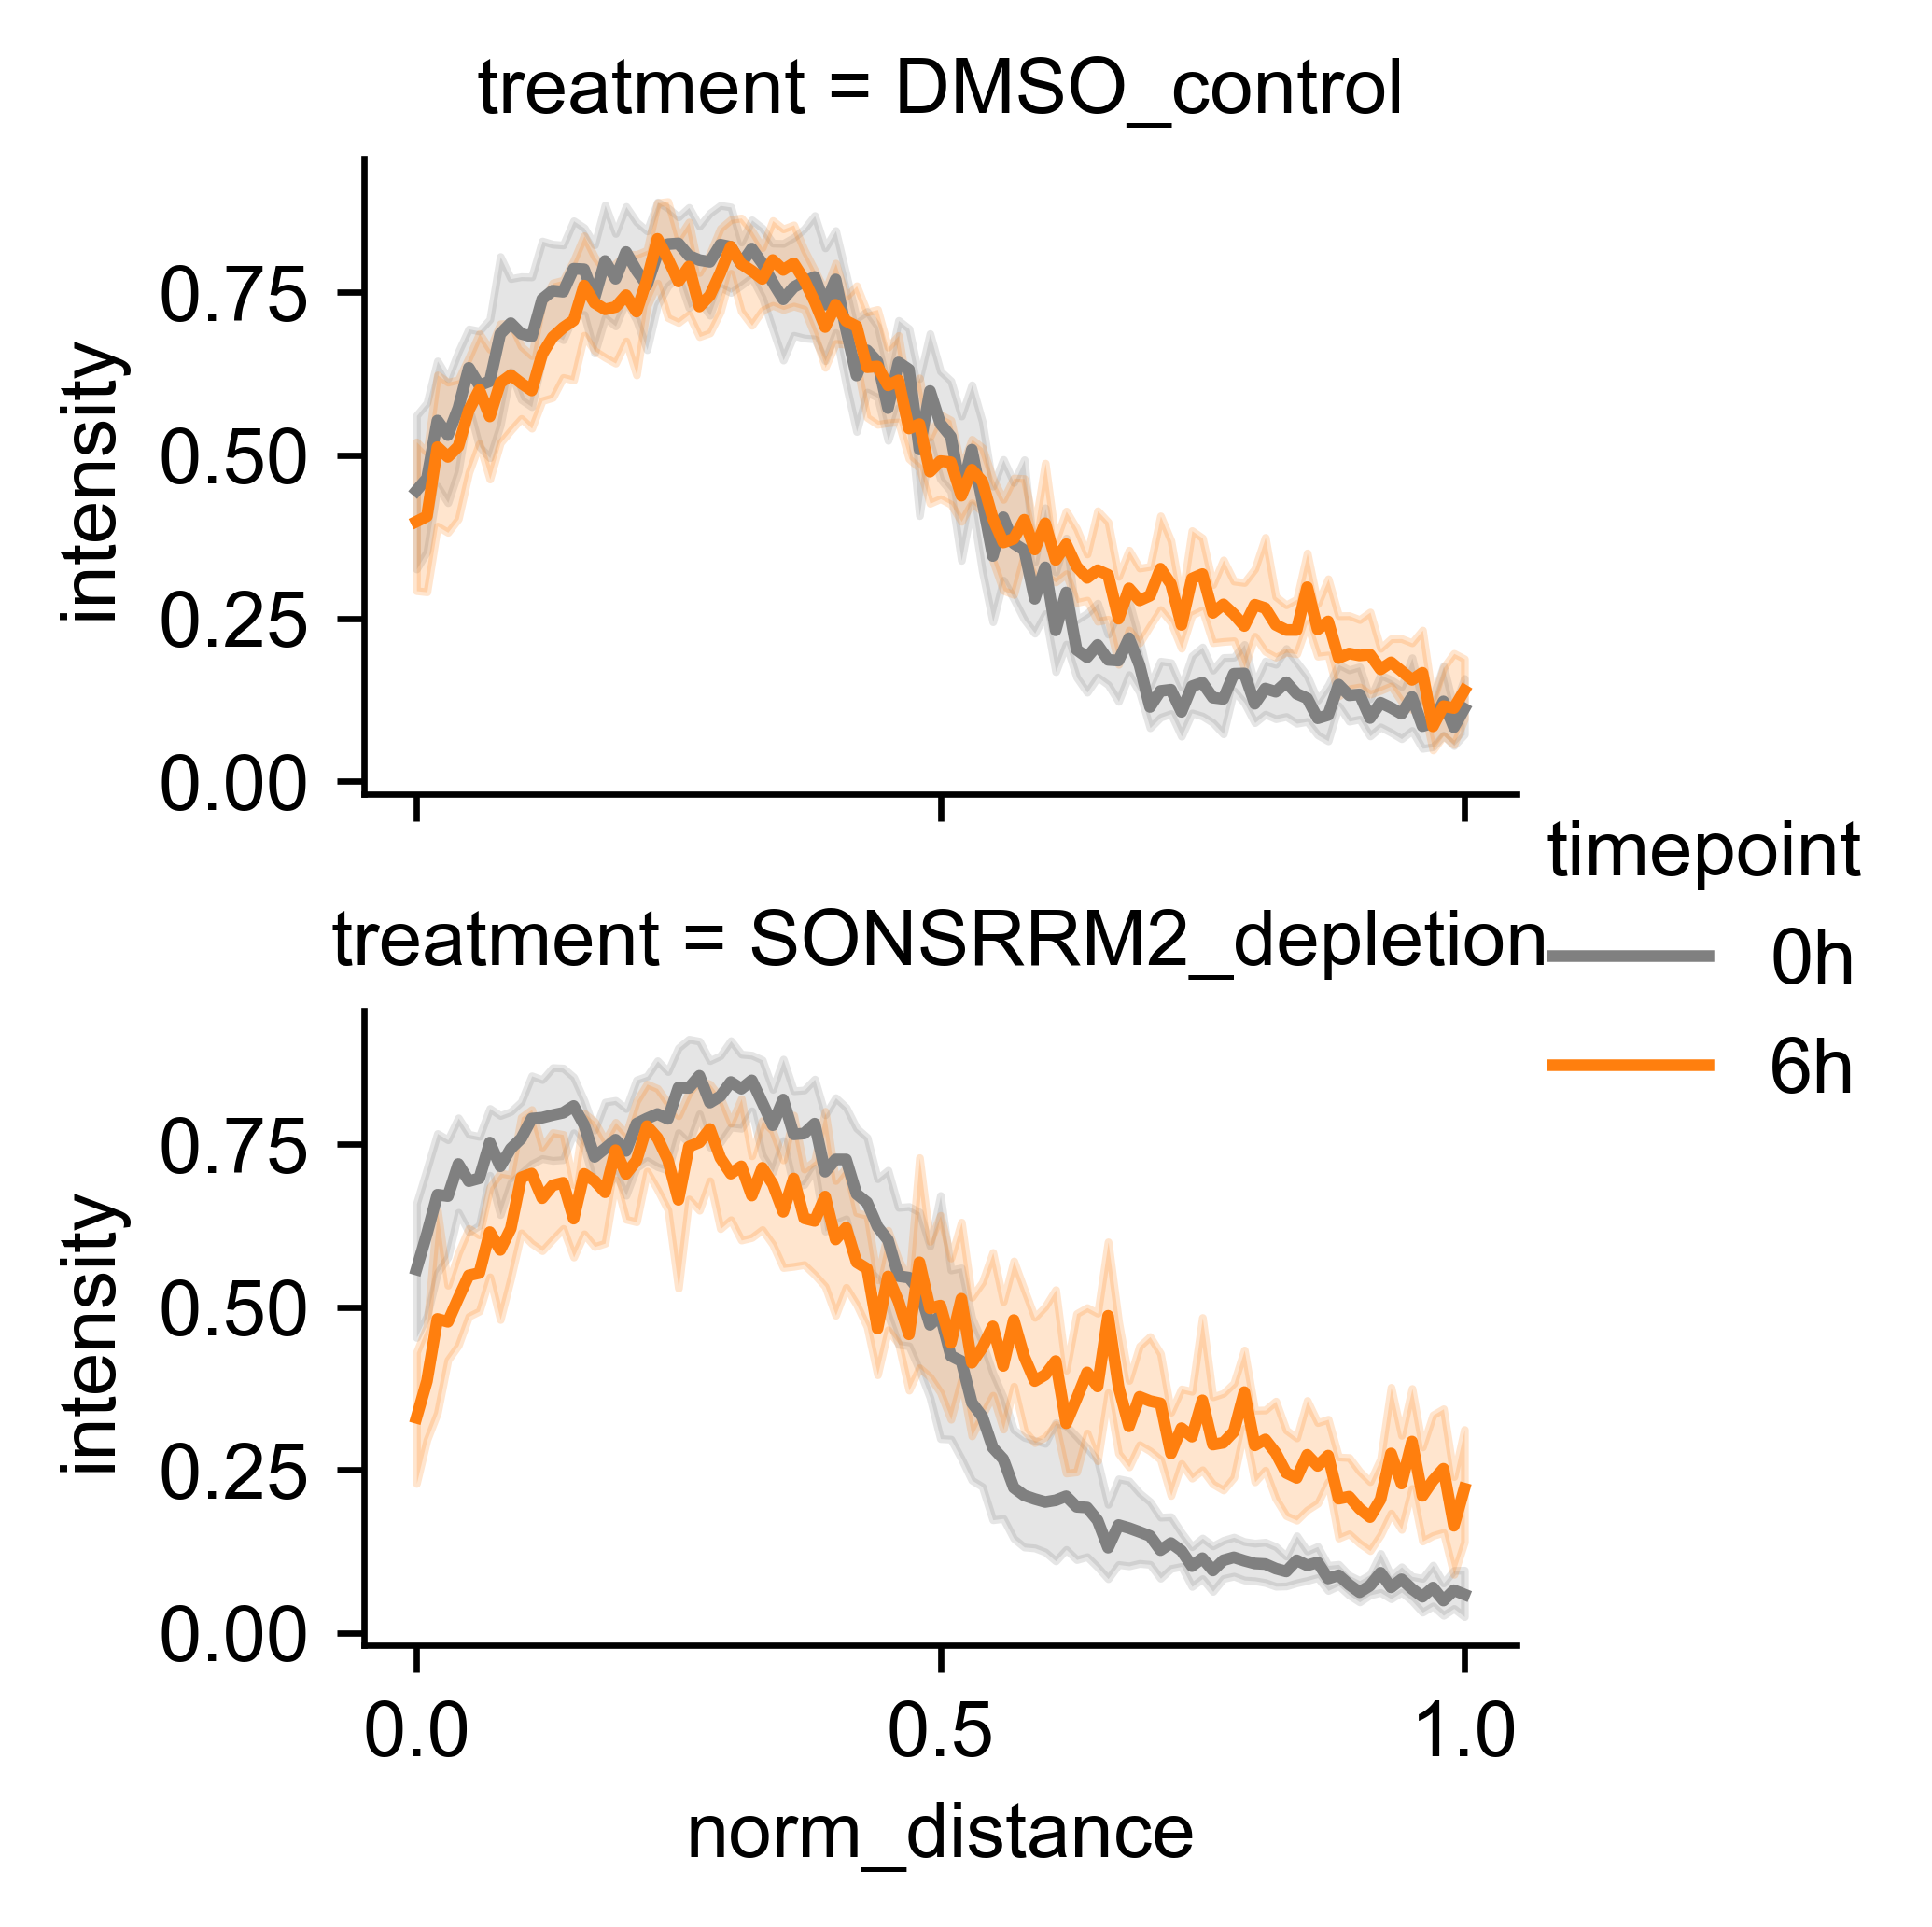

In [10]:
#plot the data

sns.relplot(merged_df, kind='line', 
            x="norm_distance", y='intensity', hue='timepoint', row='treatment',
            palette=['grey',sns.color_palette()[1]],
            height=4.5*cm, aspect=1/0.6)